In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn.impute import SimpleImputer

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/CompData-1.xlsx')

Mounted at /content/drive


In [4]:
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,...,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,...,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,...,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,...,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,...,0.317729,0.034497,0,0.006595,0.624419,0.027498,0.567177,1,0.019900,0


In [5]:
df.columns = df.columns.str.strip('_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')

<ipython-input-5-eca26acafa18>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip('_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')
<ipython-input-5-eca26acafa18>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip('_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and')


In [6]:
df.shape

(2058, 58)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan              2058 non-null   float64
 9   Realized_Sales_Gros

In [8]:
columns_to_drop = ['Co_Code','Co_Name','Default']
df_x = df.drop(columns = columns_to_drop)
df_y = df['Default']

In [9]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 55 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Operating_Expense_Rate                            2058 non-null   float64
 1   Research_and_development_expense_rate             2058 non-null   float64
 2   Cash_flow_rate                                    2058 non-null   float64
 3   Interest_bearing_debt_interest_rate               2058 non-null   float64
 4   Tax_rate_A                                        2058 non-null   float64
 5   Cash_Flow_Per_Share                               1891 non-null   float64
 6   Per_Share_Net_profit_before_tax_Yuan              2058 non-null   float64
 7   Realized_Sales_Gross_Profit_Growth_Rate           2058 non-null   float64
 8   Operating_Profit_Growth_Rate                      2058 non-null   float64
 9   Continuous_Net_Prof

In [22]:
pd.options.display.float_format = '{:.2f}'.format

df_x.describe().T

,count,mean,std,min,25%,50%,75%,max
Operating_Expense_Rate,2058.00,2052388835.76,3252623690.29,0.00,0.00,0.00,4110000000.00,9980000000.00
Research_and_development_expense_rate,2058.00,1208634256.56,2144568158.08,0.00,0.00,0.00,1550000000.00,9980000000.00
Cash_flow_rate,2058.00,0.47,0.02,0.00,0.46,0.46,0.47,1.00
Interest_bearing_debt_interest_rate,2058.00,11130223.52,90425949.04,0.00,0.00,0.00,0.00,990000000.00
Tax_rate_A,2058.00,0.11,0.15,0.00,0.00,0.04,0.22,1.00
Cash_Flow_Per_Share,1891.00,0.32,0.02,0.17,0.31,0.32,0.33,0.46
Per_Share_Net_profit_before_tax_Yuan,2058.00,0.18,0.03,0.00,0.17,0.18,0.19,0.79
Realized_Sales_Gross_Profit_Growth_Rate,2058.00,0.02,0.02,0.00,0.02,0.02,0.02,1.00
Operating_Profit_Growth_Rate,2058.00,0.85,0.00,0.74,0.85,0.85,0.85,1.00
Continuous_Net_Profit_Growth_Rate,2058.00,0.22,0.01,0.00,0.22,0.22,0.22,0.23


In [11]:
df['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

In [12]:
df['Default'].value_counts(normalize= True)

0   0.89
1   0.11
Name: Default, dtype: float64

In [13]:
df.isnull().sum()

Co_Code                                               0
Co_Name                                               0
Operating_Expense_Rate                                0
Research_and_development_expense_rate                 0
Cash_flow_rate                                        0
Interest_bearing_debt_interest_rate                   0
Tax_rate_A                                            0
Cash_Flow_Per_Share                                 167
Per_Share_Net_profit_before_tax_Yuan                  0
Realized_Sales_Gross_Profit_Growth_Rate               0
Operating_Profit_Growth_Rate                          0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                                 0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_perc                                0
Current_Ratio                                         0
Quick_Ratio                                     

In [14]:
df_x.isnull().sum().sum()

298

Outlier Check / Outlier Treatment

In [ ]:
col_names = list(df_x.columns)
fig, ax = plt.subplots(len(col_names), figsize=(8,200))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout(pad=2.0)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55]),
 [Text(1, 0, 'Operating_Expense_Rate'),
  Text(2, 0, 'Research_and_development_expense_rate'),
  Text(3, 0, 'Cash_flow_rate'),
  Text(4, 0, 'Interest_bearing_debt_interest_rate'),
  Text(5, 0, 'Tax_rate_A'),
  Text(6, 0, 'Cash_Flow_Per_Share'),
  Text(7, 0, 'Per_Share_Net_profit_before_tax_Yuan'),
  Text(8, 0, 'Realized_Sales_Gross_Profit_Growth_Rate'),
  Text(9, 0, 'Operating_Profit_Growth_Rate'),
  Text(10, 0, 'Continuous_Net_Profit_Growth_Rate'),
  Text(11, 0, 'Total_Asset_Growth_Rate'),
  Text(12, 0, 'Net_Value_Growth_Rate'),
  Text(13, 0, 'Total_Asset_Return_Growth_Rate_Ratio'),
  Text(14, 0, 'Cash_Reinvestment_perc'),
  Text(15, 0, 'Current_Ratio'),
  Text(16, 0, 'Quick_Ratio'),
  Text(17, 0, 'Interest_Expense_Ratio'),
  Text(18, 

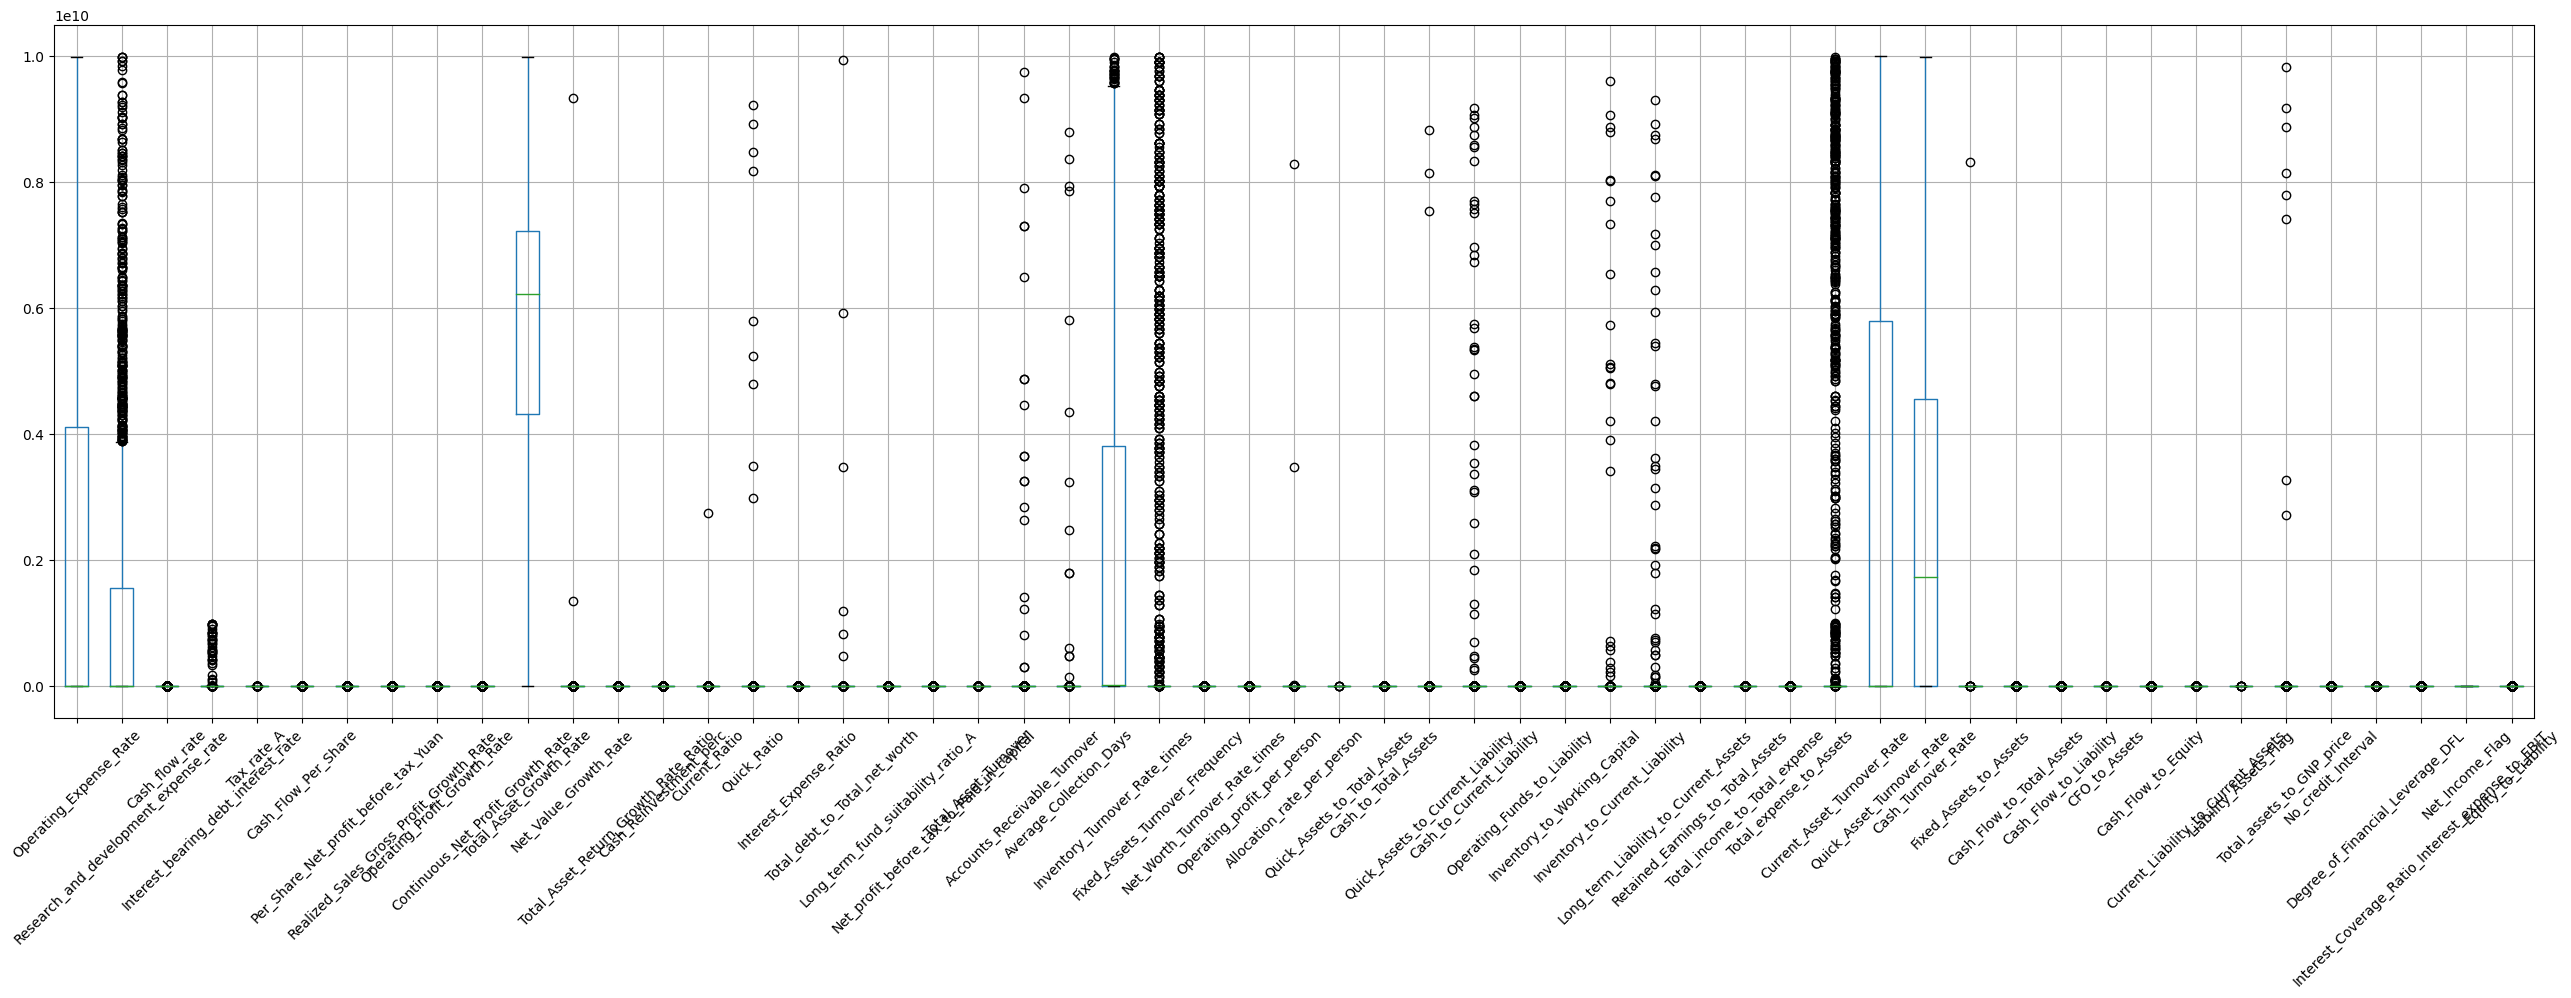

In [19]:
plt.figure(figsize=(32,9))
df_x.boxplot()
plt.xticks(rotation=45)

In [23]:
Q1 = df_x.quantile(0.25)
Q3 = df_x.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [24]:
((df_x > UL) | (df_x < LL)).sum()

Operating_Expense_Rate                                0
Research_and_development_expense_rate               264
Cash_flow_rate                                      206
Interest_bearing_debt_interest_rate                  94
Tax_rate_A                                           42
Cash_Flow_Per_Share                                 146
Per_Share_Net_profit_before_tax_Yuan                186
Realized_Sales_Gross_Profit_Growth_Rate             283
Operating_Profit_Growth_Rate                        317
Continuous_Net_Profit_Growth_Rate                   340
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                               304
Total_Asset_Return_Growth_Rate_Ratio                226
Cash_Reinvestment_perc                              220
Current_Ratio                                       193
Quick_Ratio                                         190
Interest_Expense_Ratio                              328
Total_debt_to_Total_net_worth                   

In [25]:
((df_x > UL) | (df_x < LL)).sum().sum()

10864

In [26]:
df_x[((df_x > UL) | (df_x < LL))]= np.nan

In [27]:
df_x.isnull().sum()

Operating_Expense_Rate                                0
Research_and_development_expense_rate               264
Cash_flow_rate                                      206
Interest_bearing_debt_interest_rate                  94
Tax_rate_A                                           42
Cash_Flow_Per_Share                                 313
Per_Share_Net_profit_before_tax_Yuan                186
Realized_Sales_Gross_Profit_Growth_Rate             283
Operating_Profit_Growth_Rate                        317
Continuous_Net_Profit_Growth_Rate                   340
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                               304
Total_Asset_Return_Growth_Rate_Ratio                226
Cash_Reinvestment_perc                              220
Current_Ratio                                       193
Quick_Ratio                                         190
Interest_Expense_Ratio                              328
Total_debt_to_Total_net_worth                   

In [28]:
df_x.isnull().sum().sum()

11162

In [29]:
company = pd.concat([df_x,df_y],axis= 1)

In [30]:
company

,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,...,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability,Default
0,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,0.85,0.22,...,0.31,0.03,0.00,NaN,NaN,0.03,0.57,1,0.02,0
1,9380000000.00,NaN,0.46,0.00,0.00,0.32,0.16,NaN,NaN,NaN,...,0.31,0.04,0.00,0.01,0.62,NaN,NaN,1,0.03,1
2,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,0.85,0.22,...,0.31,0.03,0.00,0.00,0.62,0.03,0.57,1,0.04,0
3,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,NaN,NaN,0.22,...,0.32,0.02,0.00,0.00,0.62,0.03,0.57,1,0.03,0
4,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,0.85,0.22,...,0.32,0.03,0.00,0.01,0.62,NaN,0.57,1,0.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,0.00,NaN,0.48,0.00,0.18,0.32,0.19,0.02,0.85,0.22,...,0.32,0.00,0.00,0.00,0.62,0.03,0.57,1,NaN,0
2054,0.00,0.00,0.47,0.00,0.00,0.32,0.17,0.02,0.85,0.22,...,0.31,0.03,0.00,0.00,0.62,NaN,NaN,1,0.05,0
2055,0.00,NaN,NaN,0.00,0.00,0.33,0.16,NaN,0.85,0.22,...,0.31,0.04,0.00,0.01,0.62,0.03,0.56,1,0.05,0
2056,3750000000.00,0.00,0.47,0.00,0.31,0.32,0.17,0.02,0.85,0.22,...,0.32,0.02,0.00,0.00,0.62,0.03,0.57,1,0.06,0


Check Missing Values

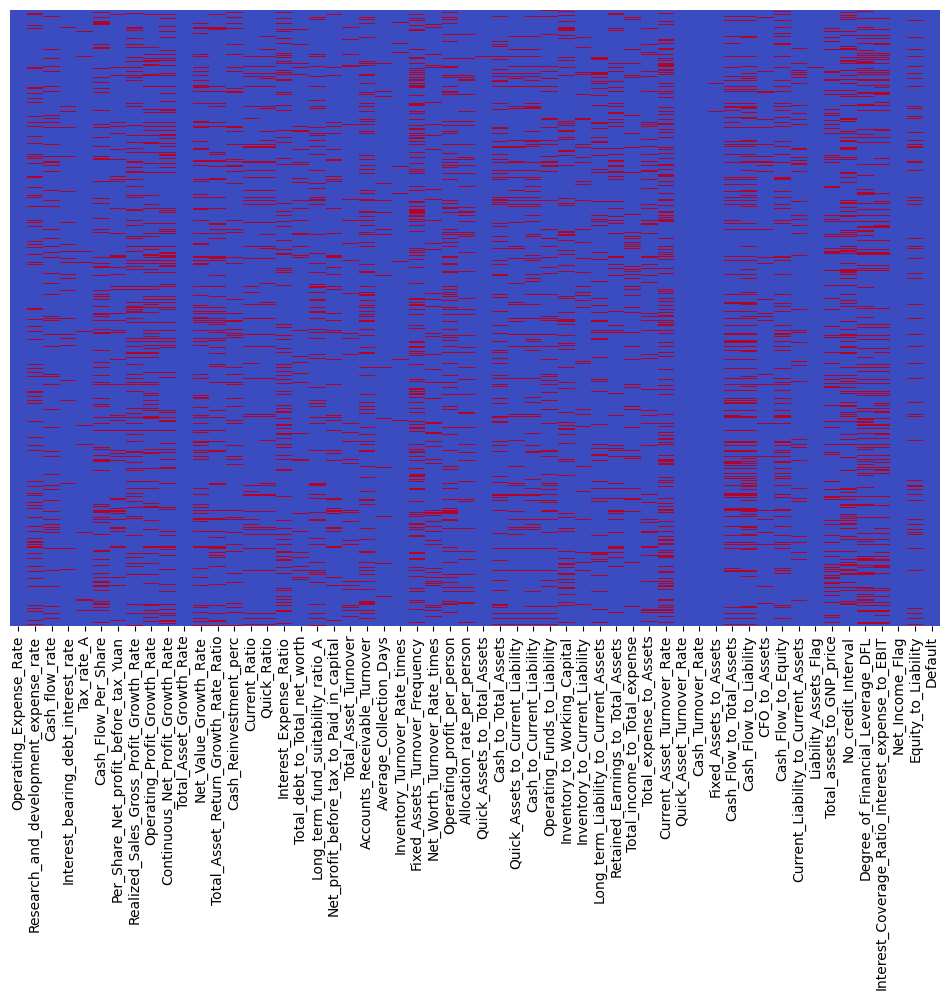

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(company.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

In [ ]:
company.isnull().sum(axis = 1)

0        5
1        9
2        1
3        6
4        1
        ..
2053    10
2054     4
2055     7
2056     0
2057     5
Length: 2058, dtype: int64

In [ ]:
Company_sub1_temp = company[company.isnull().sum(axis = 1) <= 5]

In [ ]:
Company_sub1_temp.shape

(1175, 56)

In [ ]:
Company_sub1_temp['Default'].value_counts(normalize = True)

0   0.93
1   0.07
Name: Default, dtype: float64

In [ ]:
company['Default'].value_counts(normalize = True)

0   0.89
1   0.11
Name: Default, dtype: float64

In [ ]:
company.isnull().sum().sort_values(ascending = False)/company.index.size

Fixed_Assets_Turnover_Frequency                    0.24
Current_Asset_Turnover_Rate                        0.23
Degree_of_Financial_Leverage_DFL                   0.21
Cash_Flow_to_Liability                             0.20
No_credit_Interval                                 0.19
Interest_Coverage_Ratio_Interest_expense_to_EBIT   0.18
Operating_profit_per_person                        0.17
Continuous_Net_Profit_Growth_Rate                  0.17
Interest_Expense_Ratio                             0.16
Cash_Flow_to_Total_Assets                          0.15
Operating_Profit_Growth_Rate                       0.15
Cash_Flow_Per_Share                                0.15
Cash_Flow_to_Equity                                0.15
Net_Value_Growth_Rate                              0.15
Realized_Sales_Gross_Profit_Growth_Rate            0.14
Accounts_Receivable_Turnover                       0.14
Research_and_development_expense_rate              0.13
Cash_to_Total_Assets                            

In [ ]:
predictors = df_x
response = df_y

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [ ]:
company_final = pd.concat([scaled_predictors, response], axis = 1)

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
company_imputed = pd.DataFrame(imputer.fit_transform(company_final), columns = company_final.columns)

In [ ]:
company_imputed.isnull().sum()

Operating_Expense_Rate                              0
Research_and_development_expense_rate               0
Cash_flow_rate                                      0
Interest_bearing_debt_interest_rate                 0
Tax_rate_A                                          0
Cash_Flow_Per_Share                                 0
Per_Share_Net_profit_before_tax_Yuan                0
Realized_Sales_Gross_Profit_Growth_Rate             0
Operating_Profit_Growth_Rate                        0
Continuous_Net_Profit_Growth_Rate                   0
Total_Asset_Growth_Rate                             0
Net_Value_Growth_Rate                               0
Total_Asset_Return_Growth_Rate_Ratio                0
Cash_Reinvestment_perc                              0
Current_Ratio                                       0
Quick_Ratio                                         0
Interest_Expense_Ratio                              0
Total_debt_to_Total_net_worth                       0
Long_term_fund_suitability_r

Univariate + Bivariate Analysis

lets evaluate some parameters that might be important to the default rate
1. Equity to Liability
2. Current Liability to Current Assets
3. cash flow rate
4. Net Value growth rate

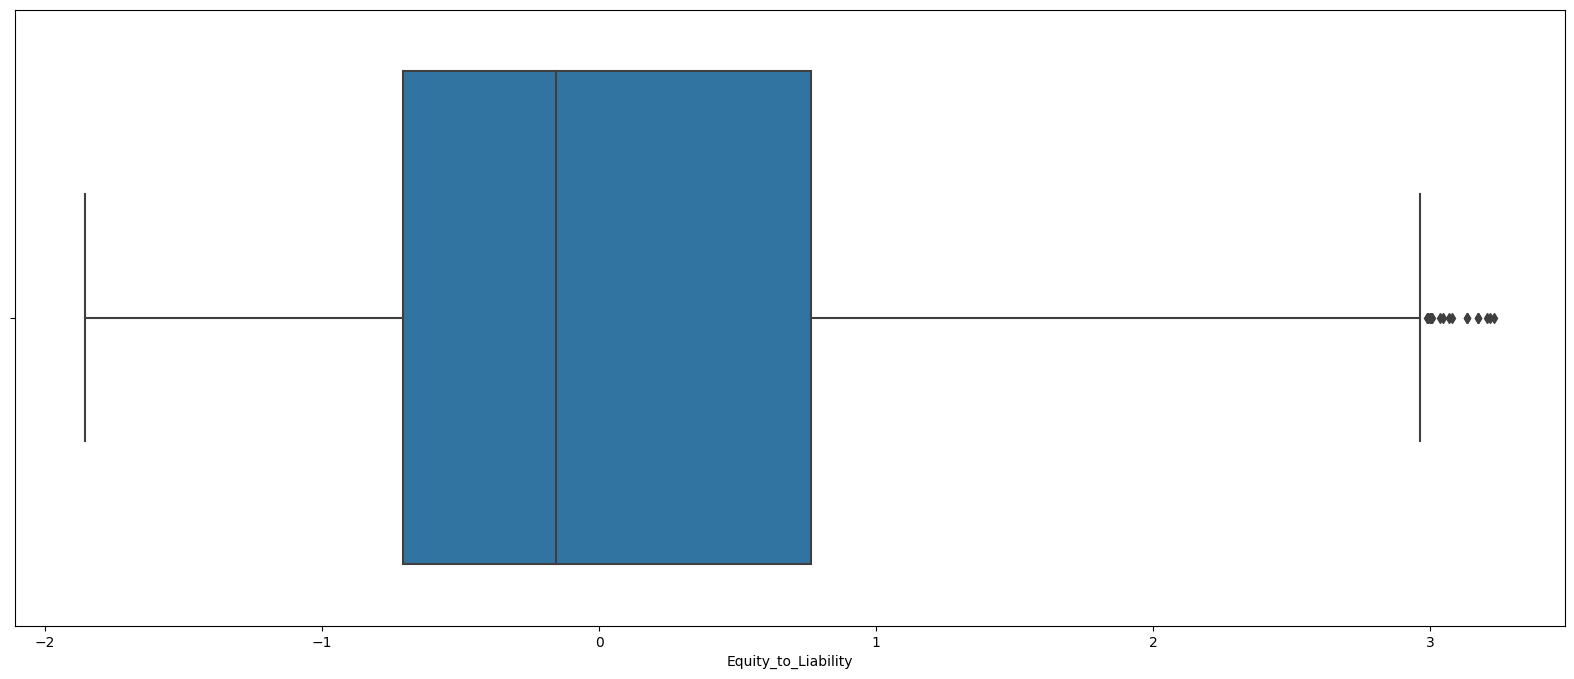

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=company_imputed, x='Equity_to_Liability');

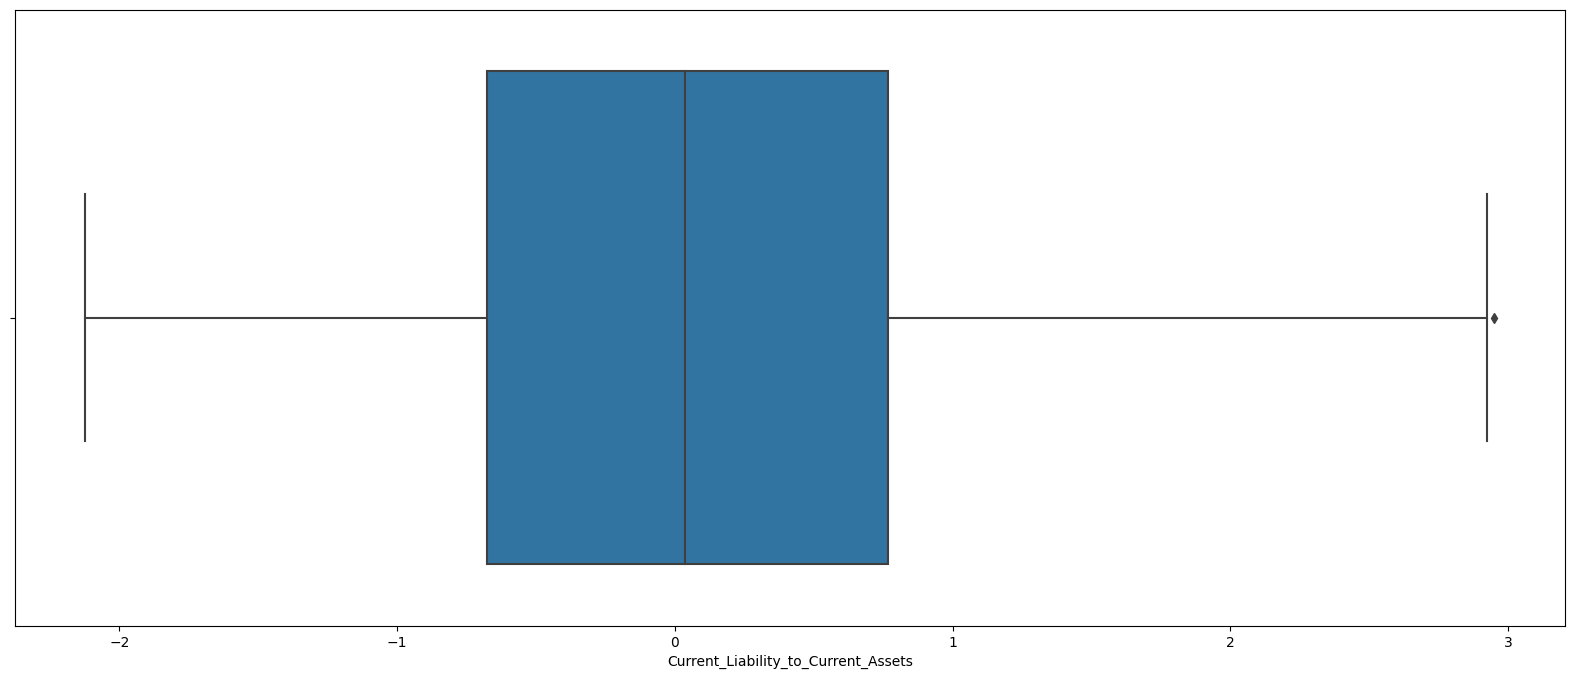

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=company_imputed, x='Current_Liability_to_Current_Assets');

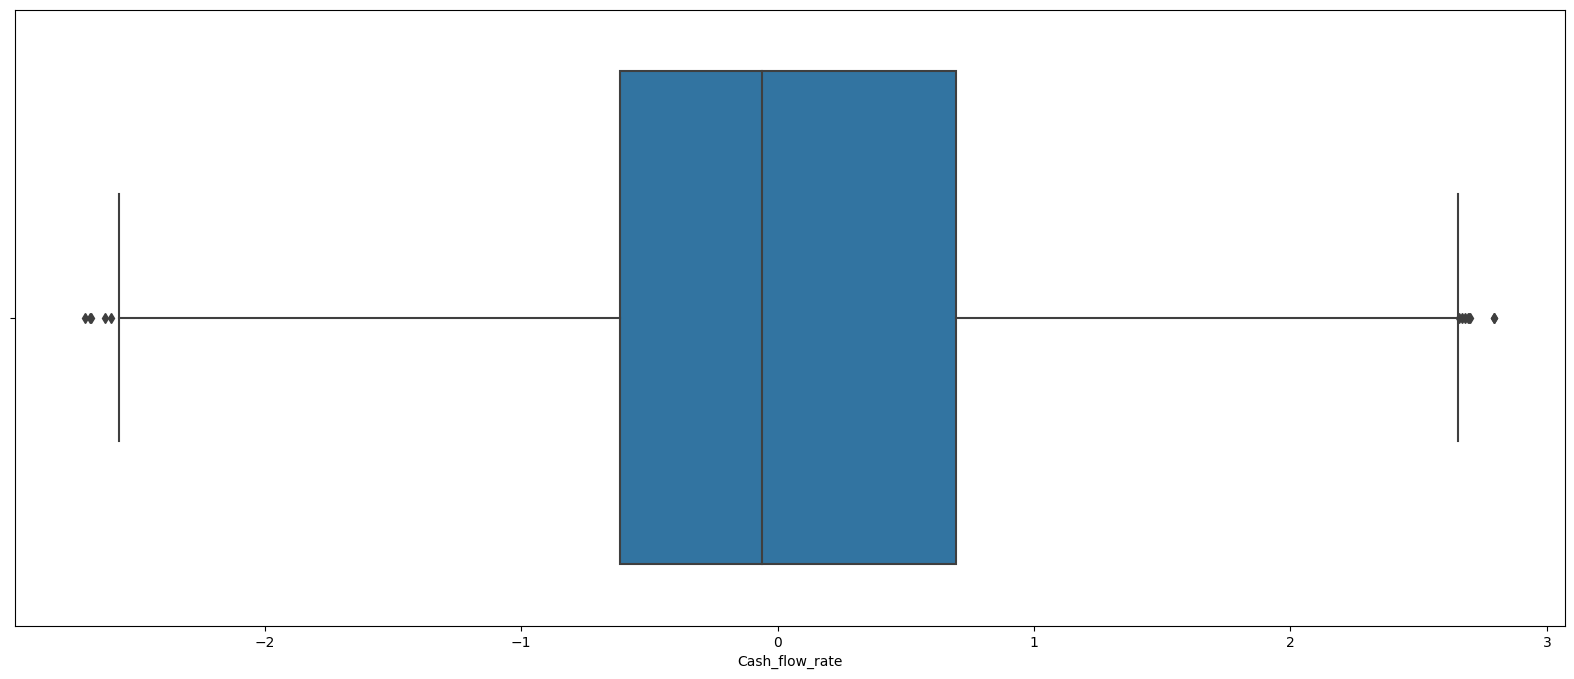

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=company_imputed, x='Cash_flow_rate');

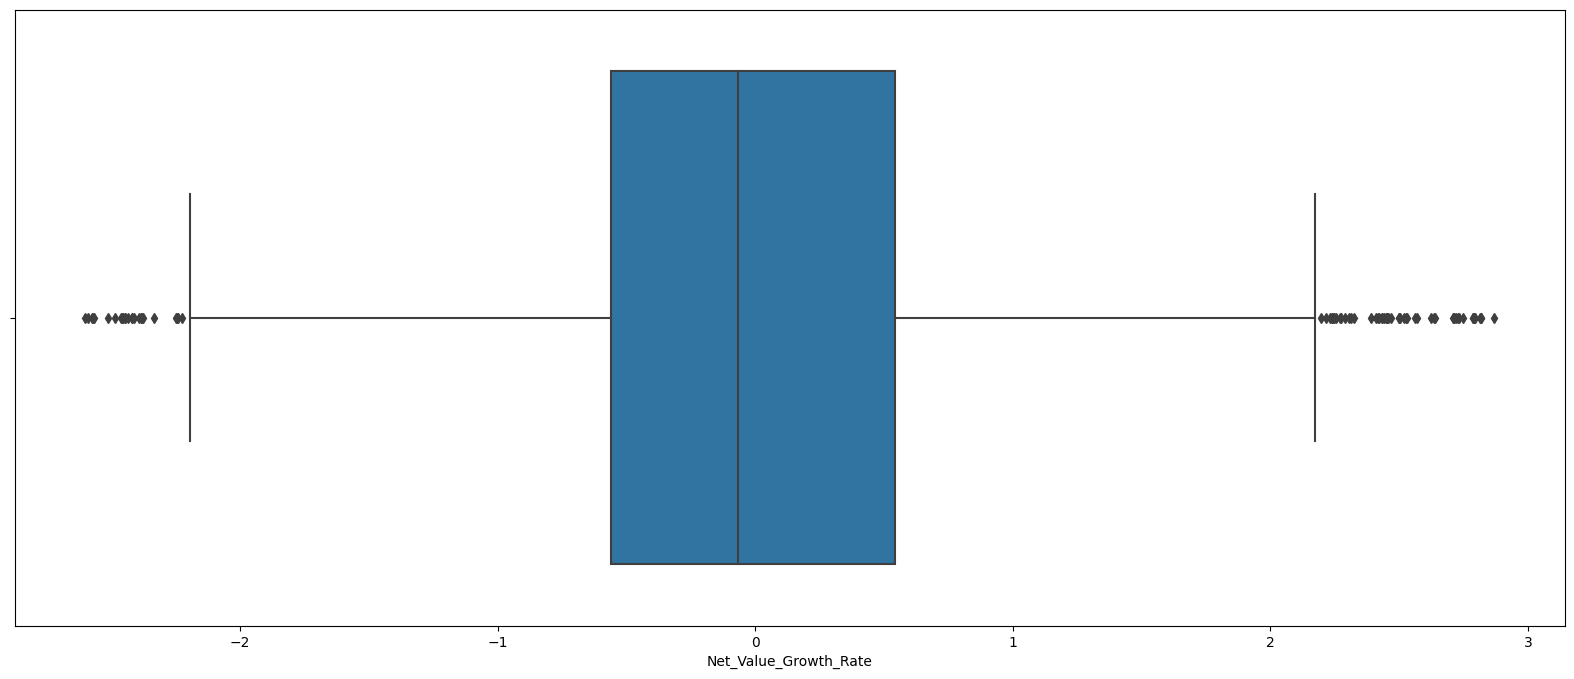

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(data=company_imputed, x='Net_Value_Growth_Rate');

<Axes: >

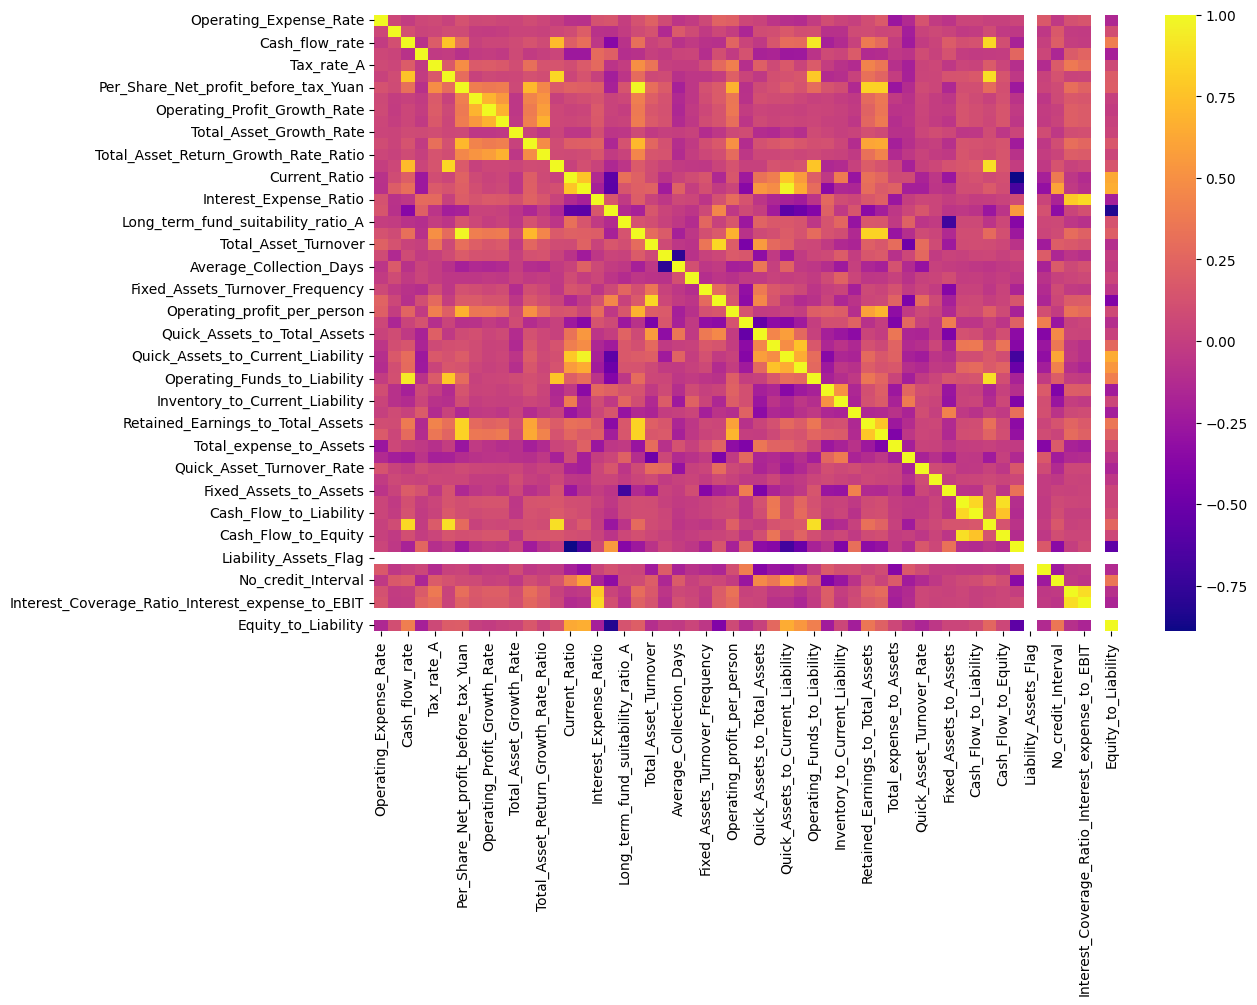

In [ ]:
plt.figure(figsize = (12,8))
cor_matrix = company_imputed.drop('Default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma')

In [ ]:
#x
predictors = company_imputed.drop('Default', axis = 1)
#y
response = company_imputed['Default']

In [ ]:
import statsmodels.formula.api as SM
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.33, random_state = 42)

In [ ]:
Company_train = pd.concat([X_train,y_train], axis=1)
Company_test = pd.concat([X_test,y_test], axis=1)

Before we build model we check for multicollinearity to remove high co-related variables

In [ ]:
LogR = LogisticRegression()

In [ ]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [ ]:
selector = selector.fit(X_train, y_train)

In [ ]:
selector.n_features_

15

In [ ]:
selector.ranking_

array([29,  3, 36,  1,  1, 21, 32, 30, 39, 34,  9, 13, 23, 14,  8,  1, 12,
        1, 24, 27,  6,  1, 19, 17, 16, 15,  1,  2,  5, 18,  1,  1, 25,  1,
       38, 31, 28,  1,  1,  7, 33, 10, 26,  1,  1,  1, 20, 37, 40, 22,  4,
       11, 35, 41,  1])

In [ ]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
3,Interest_bearing_debt_interest_rate,1
4,Tax_rate_A,1
15,Quick_Ratio,1
17,Total_debt_to_Total_net_worth,1
21,Accounts_Receivable_Turnover,1
26,Operating_profit_per_person,1
30,Quick_Assets_to_Current_Liability,1
31,Cash_to_Current_Liability,1
33,Inventory_to_Working_Capital,1
37,Total_income_to_Total_expense,1


In [ ]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [ ]:
train_cm = confusion_matrix(y_train, pred_train)
print("Train Confusion Matrix:")
print(train_cm)

train_cf = classification_report(y_train, pred_train)
print("Train Classification Matrix:")
print(train_cf)

test_cm = confusion_matrix(y_test, pred_test)
print("Test Confusion Matrix:")
print(test_cm)

test_cr = classification_report(y_test, pred_test)
print("Test Classification Matrix:")
print(test_cr)

# Calculate ROC-AUC score on the test dataset
roc_auc = roc_auc_score(y_test, pred_test)
print("Test ROC-AUC Score:", roc_auc)

Train Confusion Matrix:
[[1200   25]
 [  77   76]]
Train Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1225
         1.0       0.75      0.50      0.60       153

    accuracy                           0.93      1378
   macro avg       0.85      0.74      0.78      1378
weighted avg       0.92      0.93      0.92      1378

Test Confusion Matrix:
[[587  26]
 [ 39  28]]
Test Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       613
         1.0       0.52      0.42      0.46        67

    accuracy                           0.90       680
   macro avg       0.73      0.69      0.71       680
weighted avg       0.90      0.90      0.90       680

Test ROC-AUC Score: 0.6877480460665676


AUC: 0.688


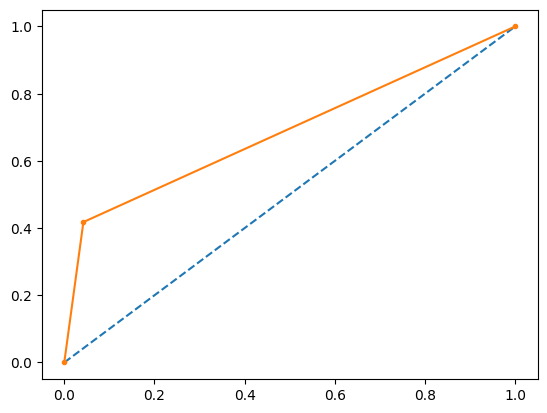

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = selector.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, pred_test)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Test Data')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
selector_smote = selector.fit(X_res, y_res)

In [ ]:
selector_smote.n_features_

15

In [ ]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [ ]:
train_cm = confusion_matrix(y_res, pred_train_smote)
print("Train Confusion Matrix:")
print(train_cm)

train_cf = classification_report(y_res, pred_train_smote)
print("Train Classification Matrix:")
print(train_cf)

test_cm = confusion_matrix(y_test, pred_test_smote)
print("Test Confusion Matrix:")
print(test_cm)

test_cr = classification_report(y_test, pred_test_smote)
print("Test Classification Matrix:")
print(test_cr)

# Calculate ROC-AUC score on the test dataset
roc_auc = roc_auc_score(y_test, pred_test_smote)
print("Test ROC-AUC Score:", roc_auc)

Train Confusion Matrix:
[[1035  190]
 [ 123 1102]]
Train Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87      1225
         1.0       0.85      0.90      0.88      1225

    accuracy                           0.87      2450
   macro avg       0.87      0.87      0.87      2450
weighted avg       0.87      0.87      0.87      2450

Test Confusion Matrix:
[[513 100]
 [ 21  46]]
Test Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89       613
         1.0       0.32      0.69      0.43        67

    accuracy                           0.82       680
   macro avg       0.64      0.76      0.66       680
weighted avg       0.90      0.82      0.85       680

Test ROC-AUC Score: 0.7617175135740548


AUC: 0.762


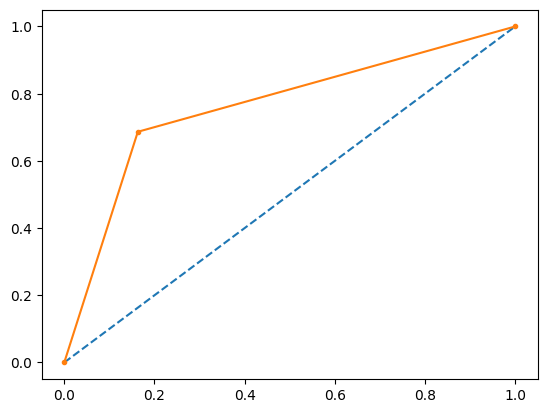

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = selector.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, pred_test_smote)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, pred_test_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Test Data')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.33, random_state = 42)

In [ ]:
# Build Random Forest Model

rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
## Performance Matrix on train data set
y_train_predict = rf_model.predict(X_train)
model_score = rf_model.score(X_train, y_train)
print(model_score)
print( confusion_matrix(y_train, y_train_predict))
print( classification_report(y_train, y_train_predict))

1.0
[[1225    0]
 [   0  153]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1225
         1.0       1.00      1.00      1.00       153

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378



In [ ]:
## Performance Matrix on test data set
y_test_predict = rf_model.predict(X_test)
model_score = rf_model.score(X_test, y_test)
print(model_score)
print( confusion_matrix(y_test, y_test_predict))
print( classification_report(y_test, y_test_predict))

0.9176470588235294
[[599  14]
 [ 42  25]]
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96       613
         1.0       0.64      0.37      0.47        67

    accuracy                           0.92       680
   macro avg       0.79      0.68      0.71       680
weighted avg       0.91      0.92      0.91       680



AUC: 0.906


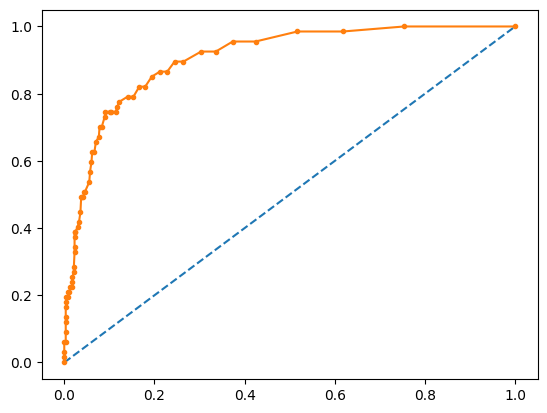

In [ ]:
# predict probabilities
probs = rf_model.predict_proba(X_test)
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [ ]:
# Get feature importances from the trained model
imp_features = rf_model.feature_importances_

# Create a DataFrame to store feature names and importances
imp_features_df = pd.DataFrame({'Feature': predictors.columns, 'Importance': imp_features})

# Sort features by importance in descending order
imp_features_df = imp_features_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(imp_features_df)

Feature Importance:
                                             Feature  Importance
17                     Total_debt_to_Total_net_worth        0.05
37                     Total_income_to_Total_expense        0.05
19          Net_profit_before_tax_to_Paid_in_capital        0.04
16                            Interest_Expense_Ratio        0.04
6               Per_Share_Net_profit_before_tax_Yuan        0.04
47               Current_Liability_to_Current_Assets        0.04
54                               Equity_to_Liability        0.04
51                  Degree_of_Financial_Leverage_DFL        0.04
36                 Retained_Earnings_to_Total_Assets        0.04
33                      Inventory_to_Working_Capital        0.03
52  Interest_Coverage_Ratio_Interest_expense_to_EBIT        0.03
11                             Net_Value_Growth_Rate        0.03
14                                     Current_Ratio        0.02
31                         Cash_to_Current_Liability        0.02
15   

In [ ]:
# Build LDA Model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.33, random_state = 42)

In [ ]:
lda = LinearDiscriminantAnalysis()

In [ ]:
lda = lda.fit(X_train,y_train)

In [ ]:
lda_train_cm = confusion_matrix(lda.predict(X_train), y_train)
print("Train Confusion Matrix:")
print(train_cm)

lda_train_cf = classification_report(lda.predict(X_train), y_train)
print("Train Classification Matrix:")
print(train_cf)

lda_test_cm = confusion_matrix(lda.predict(X_test), y_test)
print("Test Confusion Matrix:")
print(test_cm)

lda_test_cr = classification_report(lda.predict(X_test), y_test)
print("Test Classification Matrix:")
print(test_cr)

Train Confusion Matrix:
[[1035  190]
 [ 123 1102]]
Train Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87      1225
         1.0       0.85      0.90      0.88      1225

    accuracy                           0.87      2450
   macro avg       0.87      0.87      0.87      2450
weighted avg       0.87      0.87      0.87      2450

Test Confusion Matrix:
[[513 100]
 [ 21  46]]
Test Classification Matrix:
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89       613
         1.0       0.32      0.69      0.43        67

    accuracy                           0.82       680
   macro avg       0.64      0.76      0.66       680
weighted avg       0.90      0.82      0.85       680



AUC: 0.889


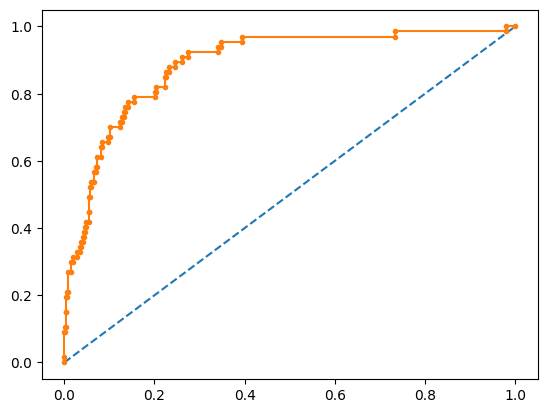

In [ ]:
# AUC and ROC for the test data

# predict probabilities
probs = lda.predict_proba(X_test)
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.', label='Test Data')
plt.show()